# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook and details can be found on the EDA Report page on Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

I have retrieved Spotify song data from 2010-2021 through Spotify's web API. This information includes artist information, album information, and song attributes. The API documentation can be found here: https://developer.spotify.com/documentation/web-api/reference/#/

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

I chose this data to gain more experience using web API's and learning to read various API documentation. This has also already given me some insight into authorization processes and endpoints. 

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

I hope to find some insights between song attributes and popularity. I am also considering gathering Billboard data as a measure of popularity depending on the results of Spotify's "popularity" measure, which is a black box to me. 

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [41]:
import base64
import requests
import datetime
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from urllib.parse import urlencode

# Client id and client secret from dashboard
cid = 'e83a24d3d9bb46f7a2668ec7d8aab852'
secret = 'fb339ddb315f4cf596ec309e756e5af0'

# Required format of token header
# Basic <base64 encoded client_id:client_secret>
client_credentials = f'{cid}:{secret}'
client_credentials_b64 = base64.b64encode(client_credentials.encode())

In [71]:
# Token information
token_url = 'https://accounts.spotify.com/api/token'
method = 'POST'
token_data = {
    'grant_type': 'client_credentials'
}
token_header = {
    'Authorization': f'Basic {client_credentials_b64.decode()}'
}

In [72]:
# Request token and confirm valid request
r = requests.post(token_url, data=token_data, headers=token_header)
valid_request = r.status_code in range(200,299)
token_response = r.json()

if valid_request:
    access_token = token_response['access_token']
    # Token expiration time: 3600 seconds
    access_token_expiration = datetime.datetime.now() + datetime.timedelta(seconds=token_response['expires_in'])

In [73]:
# Prepare queries with access token
query_headers = {
    'Authorization': f'Bearer {access_token}'
}
endpoint = 'https://api.spotify.com/v1/'

In [45]:
# Empty lists for desired qualities
# https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features
track_id = []
track_name = []
popularity = [] 

artist_id = []
artist_name = [] 
artist_popularity = []

album_type = [] 
album_total_tracks = [] 
release_date = [] 
       
acousticness = []        
danceability = []
energy = []
instrumentalness = []
key = []
liveness = []
loudness = []
mode = []
speechiness = []
tempo = []
time_signature = []
valence = []

In [76]:
'''
Gathering Spotify track data for 1,000 songs per year (maximum allowed per category using search function) 
for 12 years (2010-2021). Retrieves fifty tracks at a time (also maximum allowed per search). Appends data 
from each of the fifty tracks. 
'''
start_time = datetime.datetime.now()
# Iterate through chosen year range.
#2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
for year in years:
    print(year)
    i=0
    # Loop for gathering song ID's 50 at a time; MAX OFFSET = 1000.
    while i < 20:    
        # Popularity and Track ID come from first request
        print(f"i:{i}")
        query1_data = urlencode({'q': f'year: {year}', 'type': 'track', 'limit': 50, 'offset': i*50})
        query1_url = f'{endpoint}search?{query1_data}'
        r = requests.get(query1_url, headers=query_headers)
        
        # confirm request is complete else try again
        if r.status_code == 200: 
            r1 = r.json()['tracks']['items']
            # confirm request response is not empty else try again
            if r1: 
                # Loop to cycle through 50 songs per query 1 request for assignment
                j=0
                while j < 50:
                    print(f'j:{j} r1_len: {len(r1)}')
                    #assign track attributes from query 1
                    track_id.append(r1[j]['id'])
                    track_name.append(r1[j]['name'])
                    artist_name.append(r1[j]['artists'][0]['name'])
                    artist_id.append(r1[j]['artists'][0]['id'])
                    album_type.append(r1[j]['album']['album_type'])
                    album_total_tracks.append(r1[j]['album']['total_tracks'])
                    release_date.append(r1[j]['album']['release_date'])
                    popularity.append(r1[j]['popularity'])
                
                    # Song attributes come from second request using track ids.
                    query2_data = urlencode({'ids': f'{track_id[j]}'}) 
                    query2_url = f'{endpoint}audio-features?{query2_data}'
                    s = requests.get(query2_url, headers=query_headers)
                    
                    # confirm request is complete else try again
                    if s.status_code == 200:
                        r2 = s.json()['audio_features'] 
                        # confirm request response is not empty else try again
                        if r2: 
                            # Assign song attributes from query 2
                            acousticness.append(r2[0]['acousticness'])
                            danceability.append(r2[0]['danceability'])
                            energy.append(r2[0]['energy'])
                            instrumentalness.append(r2[0]['instrumentalness'])
                            key.append(r2[0]['key'])
                            liveness.append(r2[0]['liveness'])
                            loudness.append(r2[0]['loudness'])
                            mode.append(r2[0]['mode'])
                            speechiness.append(r2[0]['speechiness'])
                            tempo.append(r2[0]['tempo'])
                            time_signature.append(r2[0]['time_signature'])
                            valence.append(r2[0]['valence'])
                            
                            # Artist attributes come from third request using artist ids.
                            query3_data = urlencode({'ids': f'{artist_id[j]}'}) 
                            query3_url = f'{endpoint}artists?{query3_data}'
                            t = requests.get(query3_url, headers=query_headers)
                            
                            # confirm request is complete else try again
                            if t.status_code == 200: 
                                r3 = t.json()['artists'] 
                                # confirm request response is not empty else try again
                                if r3:
                                    # Assign artist attributes from query 3
                                    artist_popularity.append(r3[0]['popularity'])

                                    #increment to next song of 50
                                    j+=1
                        
                            elif t.status_code == 401:
                                print("Token expired.")
                
                    elif s.status_code == 401:
                            print("Token expired.")
            
                #increment to next group of 50 songs
                i+=1
        
        elif r.status_code == 401:
            print("Token expired.")
            
end_time = datetime.datetime.now()

2021
i:0
j:0 r1_len: 50
j:1 r1_len: 50
j:2 r1_len: 50
j:3 r1_len: 50
j:4 r1_len: 50
j:5 r1_len: 50
j:6 r1_len: 50
j:7 r1_len: 50
j:8 r1_len: 50
j:9 r1_len: 50
j:10 r1_len: 50
j:11 r1_len: 50
j:12 r1_len: 50
j:13 r1_len: 50
j:14 r1_len: 50
j:15 r1_len: 50
j:16 r1_len: 50
j:17 r1_len: 50
j:18 r1_len: 50
j:19 r1_len: 50
j:20 r1_len: 50
j:21 r1_len: 50
j:22 r1_len: 50
j:23 r1_len: 50
j:24 r1_len: 50
j:25 r1_len: 50
j:26 r1_len: 50
j:27 r1_len: 50
j:28 r1_len: 50
j:29 r1_len: 50
j:30 r1_len: 50
j:31 r1_len: 50
j:32 r1_len: 50
j:33 r1_len: 50
j:34 r1_len: 50
j:35 r1_len: 50
j:36 r1_len: 50
j:37 r1_len: 50
j:38 r1_len: 50
j:39 r1_len: 50
j:40 r1_len: 50
j:41 r1_len: 50
j:42 r1_len: 50
j:43 r1_len: 50
j:44 r1_len: 50
j:45 r1_len: 50
j:46 r1_len: 50
j:47 r1_len: 50
j:48 r1_len: 50
j:49 r1_len: 50
i:1
j:0 r1_len: 50
j:1 r1_len: 50
j:2 r1_len: 50
j:3 r1_len: 50
j:4 r1_len: 50
j:5 r1_len: 50
j:6 r1_len: 50
j:7 r1_len: 50
j:8 r1_len: 50
j:9 r1_len: 50
j:10 r1_len: 50
j:11 r1_len: 50
j:12 r1_len: 50

j:16 r1_len: 50
j:17 r1_len: 50
j:18 r1_len: 50
j:19 r1_len: 50
j:20 r1_len: 50
j:21 r1_len: 50
j:22 r1_len: 50
j:23 r1_len: 50
j:24 r1_len: 50
j:25 r1_len: 50
j:26 r1_len: 50
j:27 r1_len: 50
j:28 r1_len: 50
j:29 r1_len: 50
j:30 r1_len: 50
j:31 r1_len: 50
j:32 r1_len: 50
j:33 r1_len: 50
j:34 r1_len: 50
j:35 r1_len: 50
j:36 r1_len: 50
j:37 r1_len: 50
j:38 r1_len: 50
j:39 r1_len: 50
j:40 r1_len: 50
j:41 r1_len: 50
j:42 r1_len: 50
j:43 r1_len: 50
j:44 r1_len: 50
j:45 r1_len: 50
j:46 r1_len: 50
j:47 r1_len: 50
j:48 r1_len: 50
j:49 r1_len: 50
i:11
j:0 r1_len: 50
j:1 r1_len: 50
j:2 r1_len: 50
j:3 r1_len: 50
j:4 r1_len: 50
j:5 r1_len: 50
j:6 r1_len: 50
j:7 r1_len: 50
j:8 r1_len: 50
j:9 r1_len: 50
j:10 r1_len: 50
j:11 r1_len: 50
j:12 r1_len: 50
j:13 r1_len: 50
j:14 r1_len: 50
j:15 r1_len: 50
j:16 r1_len: 50
j:17 r1_len: 50
j:18 r1_len: 50
j:19 r1_len: 50
j:20 r1_len: 50
j:21 r1_len: 50
j:22 r1_len: 50
j:23 r1_len: 50
j:24 r1_len: 50
j:25 r1_len: 50
j:26 r1_len: 50
j:27 r1_len: 50
j:28 r1_len: 

In [77]:
print(f"Total time to gather data:{end_time-start_time}")

print(len(track_id))

Total time to gather data:0:04:29.386366
12000
12000


In [78]:
# Create dataframe
import pandas as pd

mydata = pd.DataFrame({'Track_ID':track_id,
                       'Track_Name':track_name,
                       'Popularity':popularity,
                       'Artist_Name':artist_name,
                       'Artist_Popularity':artist_popularity,
                       'Album_Type':album_type,
                       'Album_Total_Tracks':album_total_tracks,
                       'Release_Date':release_date,
                       'Acousticness':acousticness, 
                       'Danceability':danceability, 
                       'Energy':energy, 
                       'Instrumentalness':instrumentalness,
                       'Key':key, 
                       'Liveness':liveness, 
                       'Loudness':loudness, 
                       'Mode':mode, 
                       'Speechiness':speechiness, 
                       'Tempo':tempo, 
                       'Time_Signature':time_signature, 
                       'Valence':valence})

In [79]:
mydata.to_csv('EDA_data.csv')

<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [80]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
mydata.info()
# TODO: Use the head() method to inspect the first five (or more) rows of the data
mydata.head()
# TODO: Use the tail() method to inspect the last five (or more) rows of the data
mydata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Track_ID            12000 non-null  object 
 1   Track_Name          12000 non-null  object 
 2   Popularity          12000 non-null  int64  
 3   Artist_Name         12000 non-null  object 
 4   Artist_Popularity   12000 non-null  int64  
 5   Album_Type          12000 non-null  object 
 6   Album_Total_Tracks  12000 non-null  int64  
 7   Release_Date        12000 non-null  object 
 8   Acousticness        12000 non-null  float64
 9   Danceability        12000 non-null  float64
 10  Energy              12000 non-null  float64
 11  Instrumentalness    12000 non-null  float64
 12  Key                 12000 non-null  int64  
 13  Liveness            12000 non-null  float64
 14  Loudness            12000 non-null  float64
 15  Mode                12000 non-null  int64  
 16  Spee

,Track_ID,Track_Name,Popularity,Artist_Name,Artist_Popularity,Album_Type,Album_Total_Tracks,Release_Date,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time_Signature,Valence
11995,5hRFjooNvZWb9gdnXjrv2j,Hablando Claro (En Vivo),74,Grupo Firme,73,single,1,2021-08-12,0.0927,0.587,0.622,0.000636,4,0.2000,-5.535,1,0.0303,107.943,4,0.231
11996,1CfMKZb0lxnlVah60fgktX,Superlative Moods for 2021,0,Musica Rilassante & Benessere,86,album,10,2021-01-01,0.0630,0.687,0.631,0.000000,9,0.1080,-5.612,1,0.1290,186.071,4,0.853
11997,1Fhb9iJPufNMZSwupsXiRe,beside you,72,keshi,90,single,1,2021-04-23,0.0111,0.722,0.758,0.000000,11,0.3080,-4.477,0,0.0471,128.047,4,0.620
11998,552tXMAOIiS388mijWuNKP,Bleed - Living Room Session 2021,0,Brian Gaudet,63,album,11,2021-12-17,0.3480,0.606,0.497,0.000000,4,0.2750,-6.611,1,0.0277,130.739,4,0.362
11999,0IUprcNjE2hDtlvY8rq2W9,One Day,70,Lovejoy,93,single,4,2021-05-08,0.3000,0.794,0.711,0.000000,8,0.0955,-5.124,0,0.0699,174.915,4,0.955


<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1. I hope to discover correlations between track attributes, such as tempo and key, with track popularity. I have collected traditional measures of track attributes within music theory, but also Spotify's measures used for recommendations.
2. I have a hunch that factors such as artist popularity will hold more sway in track popularity than song attributes. In this case, I plan to evaluate without artist popularity where I expect faster tempo and high "danceability" songs to have a higher popularity due to higher airtime in traditional radio. 

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

1. The population represented is the catalog of tracks from Spotify's database. This includes a variety of mainstream and independent artists, and excludes any tracks or artists that are not available on Spotify.
2. The total sample size is 12,000 total tracks with 1,000 tracks from each year in the range 2010-2021 inclusive. 

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data was collected through Spotify's web API. This sample is random to me as a user; however, if Spotify organizes their tracks in a black box capacity, then the first 1,000 viable tracks from each year's catalog have been selected. Sampling weights are used in regards to selecting 1,000 tracks from each year in order to be representative of the past approximate decade. Rather than selecting all 12,000 tracks from a single year. 

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

'Track_ID': string of alphanumeric characters; unique identifier for tracks in Spotify.

'Track_Name': string representing the official track title.

'Popularity': int representing a track's popularity; 0 being least popular and 100 being most popular.

'Artist_Name': string representing the primary artist name.

'Artist_Popularity': int representing an artist's popularity; 0 being least popular and 100 being most popular.

'Album_Type': string representing album type; allowed values:"album", "single", "compilation".

'Album_Total_Tracks': int representing how many tracks are in the album.

'Release_Date': string representing the release date; format of "XXXX" year, "XXXX-XX" month, or "XXXX-XX-XX" day.

'Acousticness': float representing a confidence measure from 0.0 to 1.0 of whether the track is acoustic; 1.0 represents high confidence the track is acoustic.

'Danceability': float that represents how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity; a value of 0.0 is least danceable and 1.0 is most danceable. 

'Energy': float that represents a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity; a value of 0.0 is low energy and 1.0 is high energy.

'Instrumentalness': float that represents a prediciton of whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

'Key': int representing the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

'Liveness': float representing the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

'Loudness': float representing the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

'Mode': int representing the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

'Speechiness': float representing the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

'Tempo': float representing the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

'Time_Signature':int representing an estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

'Valence': float representing a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Evaluating our main variable: Popularity

In [115]:
mydata['Popularity'].describe()

count    12000.000000
mean        38.090917
std         31.679264
min          0.000000
25%          1.000000
50%         54.000000
75%         67.000000
max         92.000000
Name: Popularity, dtype: float64

<AxesSubplot:>

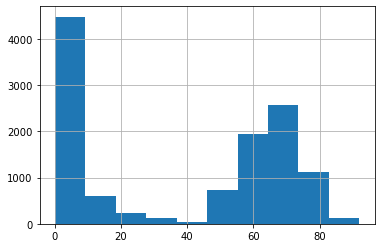

In [116]:
mydata['Popularity'].hist(bins=10)

In [117]:
mydata['Popularity'].value_counts()

0     2811
1      351
70     317
66     309
67     298
      ... 
36       3
91       3
43       2
41       2
92       1
Name: Popularity, Length: 93, dtype: int64

Here we see that our popularity measurements have 2811 values with zero. Later we will take a look at when these songs were released to make sure their popularity measurement has been calculated. 

In [118]:
numerical_vars = ['Popularity', 'Artist_Popularity', 'Album_Total_Tracks', 'Acousticness', 'Danceability', 'Energy', \
                 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']
categorical_vars = ['Album_Type', 'Key', 'Mode', 'Time_Signature']

### Evaluating Numerical Variables

In [132]:
mydata[numerical_vars].describe()

,Popularity,Artist_Popularity,Album_Total_Tracks,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
count,12000.000000,12000.0000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,38.090917,83.6800,22.417667,0.187432,0.627160,0.723860,0.045450,0.197434,-5.572740,0.084832,120.637980,0.553048
std,31.679264,9.6034,25.781142,0.232367,0.141032,0.167368,0.185199,0.179829,2.489125,0.081647,28.181196,0.225376
min,0.000000,63.0000,1.000000,0.000346,0.247000,0.187000,0.000000,0.029000,-16.757000,0.026500,65.043000,0.078400
25%,1.000000,76.0000,11.000000,0.016200,0.542000,0.622000,0.000000,0.086200,-5.972000,0.035700,97.012000,0.377000
50%,54.000000,84.5000,15.000000,0.089800,0.672000,0.759000,0.000000,0.116000,-5.012500,0.046000,121.023500,0.600000
75%,67.000000,93.0000,23.000000,0.300000,0.723000,0.841000,0.000046,0.241000,-4.239000,0.109000,132.731000,0.720000
max,92.000000,98.0000,200.000000,0.989000,0.855000,0.954000,0.895000,0.744000,-1.190000,0.449000,186.071000,0.955000


array([[<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'Artist_Popularity'}>,
        <AxesSubplot:title={'center':'Album_Total_Tracks'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Instrumentalness'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Loudness'}>,
        <AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Tempo'}>,
        <AxesSubplot:title={'center':'Valence'}>]], dtype=object)

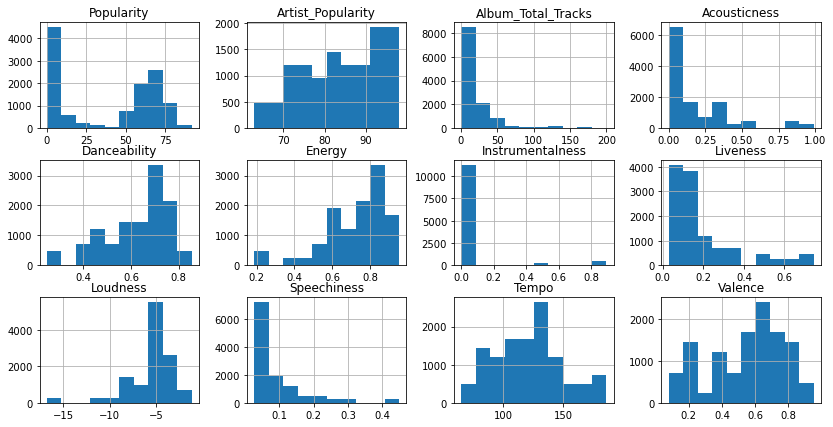

In [119]:
mydata[numerical_vars].hist(bins=10, figsize=(14,7), layout=(3,4))

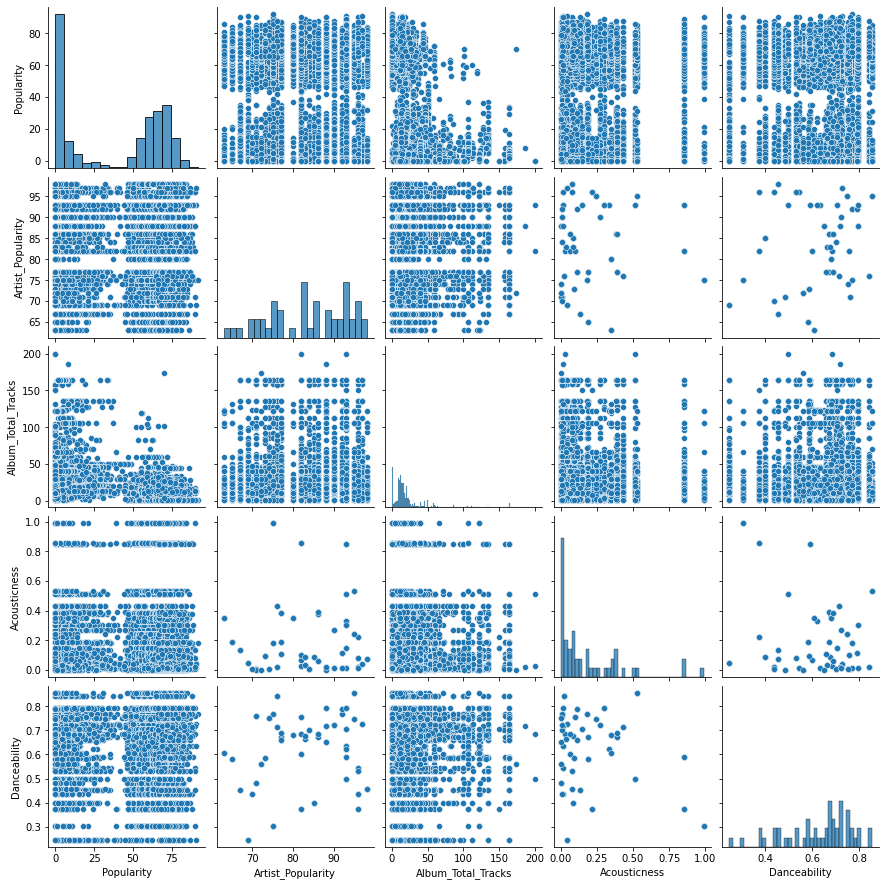

In [126]:
sns.pairplot(mydata[numerical_vars[:5]])

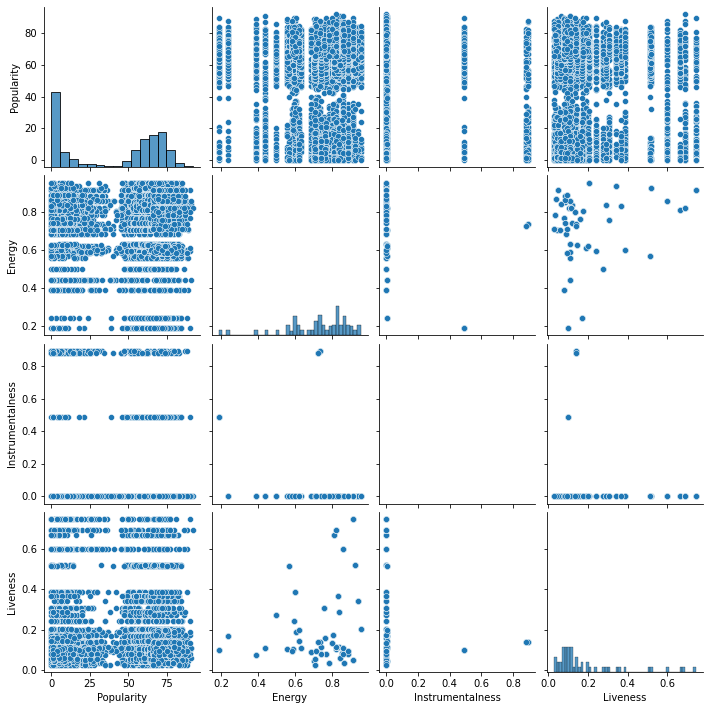

In [170]:
sns.pairplot(mydata[['Popularity'] + numerical_vars[5:8]])

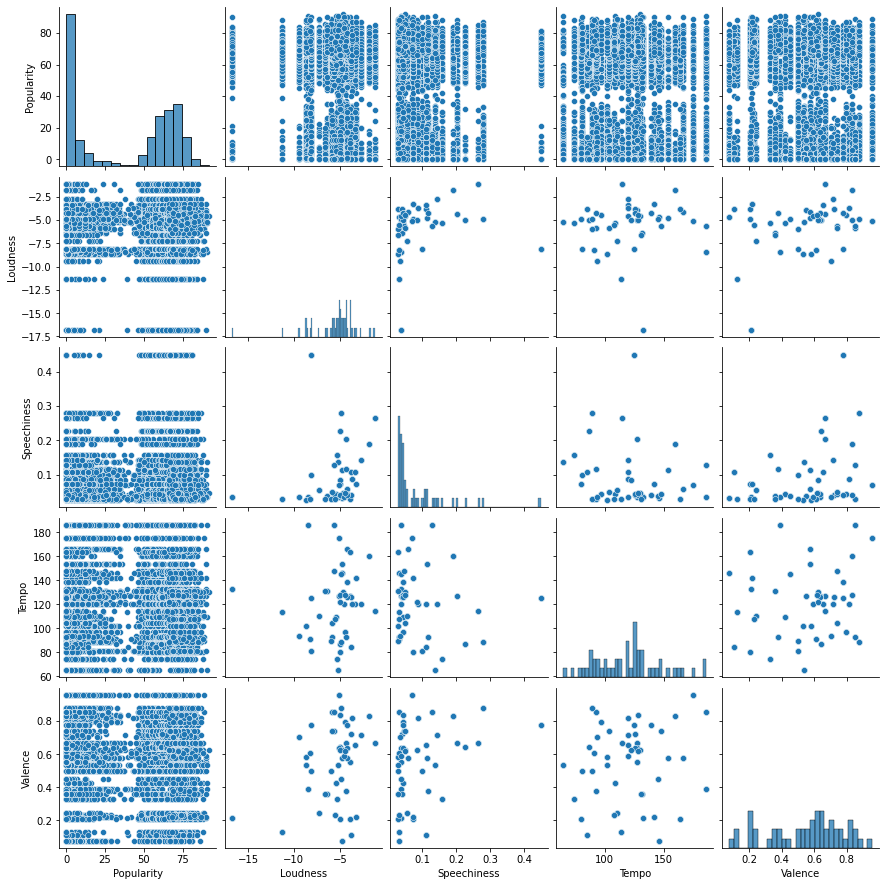

In [130]:
sns.pairplot(mydata[['Popularity'] + numerical_vars[8:]])

### Evaluating Categorical Variables

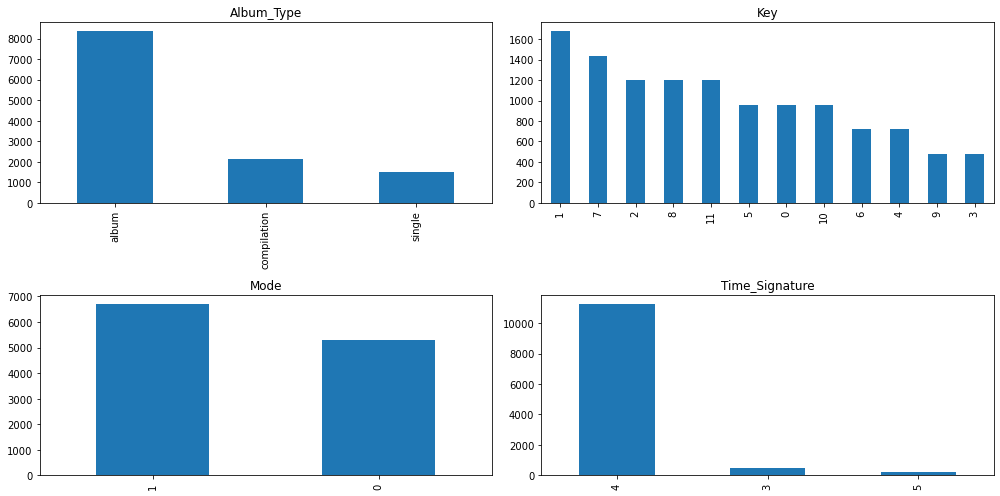

In [113]:
fig, ax = plt.subplots(2,2, figsize=(14,7))
for var, subplot in zip(categorical_vars, ax.flatten()):
    mydata[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

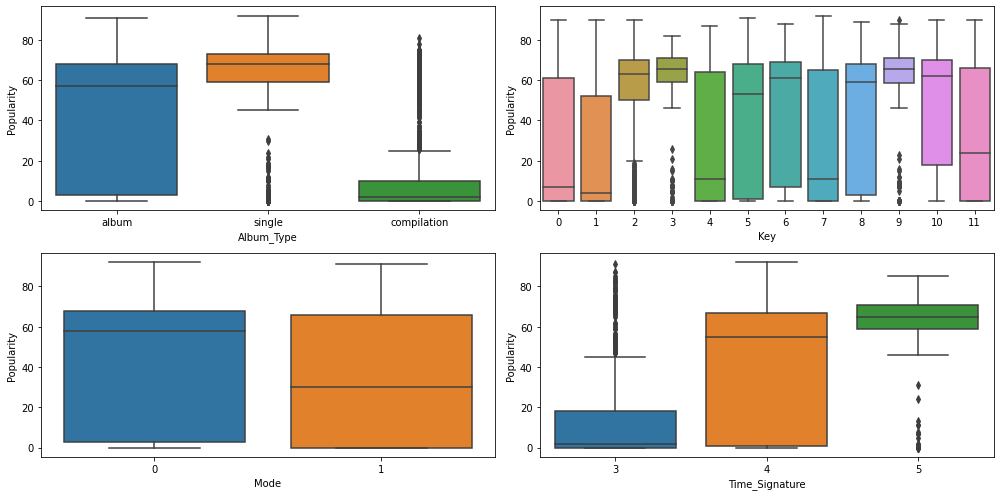

In [121]:
fig, ax = plt.subplots(2,2, figsize=(14,7))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='Popularity', data=mydata, ax=subplot)

fig.tight_layout()

'Key' appears to have no values of -1, which equates to no available reading on key. This means we do not need to remove any instances without an available key.

In [123]:
mydata['Key'].value_counts()

1     1680
7     1440
2     1200
8     1200
11    1200
5      960
0      960
10     960
6      720
4      720
9      480
3      480
Name: Key, dtype: int64

### Edit release_date to be a datetime variable

In [145]:
mydata['Release_Date'] = pd.to_datetime(mydata['Release_Date'], format='%Y-%m-%d')
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Track_ID            12000 non-null  object        
 1   Track_Name          12000 non-null  object        
 2   Popularity          12000 non-null  int64         
 3   Artist_Name         12000 non-null  object        
 4   Artist_Popularity   12000 non-null  int64         
 5   Album_Type          12000 non-null  object        
 6   Album_Total_Tracks  12000 non-null  int64         
 7   Release_Date        12000 non-null  datetime64[ns]
 8   Acousticness        12000 non-null  float64       
 9   Danceability        12000 non-null  float64       
 10  Energy              12000 non-null  float64       
 11  Instrumentalness    12000 non-null  float64       
 12  Key                 12000 non-null  int64         
 13  Liveness            12000 non-null  float64   

Precision here varies, with some dates having only year, some having month and year and some having an exact date. For this reason, I will be only looking at the year for consistency. 

In [174]:
mydata['Release_Year'] = mydata['Release_Date'].dt.year
mydata.drop(['Release_Date'], axis=1, inplace=True)

In [175]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Track_ID            11485 non-null  object 
 1   Track_Name          11485 non-null  object 
 2   Popularity          11485 non-null  int64  
 3   Artist_Name         11485 non-null  object 
 4   Artist_Popularity   11485 non-null  int64  
 5   Album_Type          11485 non-null  object 
 6   Album_Total_Tracks  11485 non-null  int64  
 7   Acousticness        11485 non-null  float64
 8   Danceability        11485 non-null  float64
 9   Energy              11485 non-null  float64
 10  Instrumentalness    11485 non-null  float64
 11  Key                 11485 non-null  int64  
 12  Liveness            11485 non-null  float64
 13  Loudness            11485 non-null  float64
 14  Mode                11485 non-null  int64  
 15  Speechiness         11485 non-null  float64
 16  Temp

### Evaluate popularity of zero

In [157]:
pop_zero = mydata[mydata['Popularity'] == 0]

In [158]:
pop_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 1145 to 11998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Track_ID            2811 non-null   object        
 1   Track_Name          2811 non-null   object        
 2   Popularity          2811 non-null   int64         
 3   Artist_Name         2811 non-null   object        
 4   Artist_Popularity   2811 non-null   int64         
 5   Album_Type          2811 non-null   object        
 6   Album_Total_Tracks  2811 non-null   int64         
 7   Release_Date        2811 non-null   datetime64[ns]
 8   Acousticness        2811 non-null   float64       
 9   Danceability        2811 non-null   float64       
 10  Energy              2811 non-null   float64       
 11  Instrumentalness    2811 non-null   float64       
 12  Key                 2811 non-null   int64         
 13  Liveness            2811 non-null   float64 

In [159]:
pop_zero['Release_Year'].value_counts()

2020    463
2021    437
2018    283
2019    267
2017    253
2013    222
2014    194
2016    173
2015    156
2012    103
2011     91
2022     63
2006     35
2010     23
2002     13
2004     12
2009      6
2003      6
1962      5
2001      1
2008      1
1975      1
1999      1
1989      1
1967      1
Name: Release_Year, dtype: int64

If we assume that popularity is measured over time, we can remove all songs with popularity of zero released in 2022 and 2021, as they have not had a full year to gain popularity. Anything before that can be assumed as an obscure song with a reasonable popularity. 

In [164]:
mydata.shape

(12000, 21)

In [163]:
drop_data = pop_zero[pop_zero['Release_Year'] >= 2021]
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1153 to 11998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Track_ID            500 non-null    object        
 1   Track_Name          500 non-null    object        
 2   Popularity          500 non-null    int64         
 3   Artist_Name         500 non-null    object        
 4   Artist_Popularity   500 non-null    int64         
 5   Album_Type          500 non-null    object        
 6   Album_Total_Tracks  500 non-null    int64         
 7   Release_Date        500 non-null    datetime64[ns]
 8   Acousticness        500 non-null    float64       
 9   Danceability        500 non-null    float64       
 10  Energy              500 non-null    float64       
 11  Instrumentalness    500 non-null    float64       
 12  Key                 500 non-null    int64         
 13  Liveness            500 non-null    float64  

In [168]:
mydata.drop(drop_data.index, axis=0, inplace=True)

In [169]:
mydata.shape

(11500, 21)

### Check for Duplicates

In [171]:
mydata.duplicated().sum()

15

In [172]:
mydata.drop_duplicates(inplace=True)

In [173]:
mydata.shape

(11485, 21)

1. Rows with a popularity of zero from the years 2021-2022 were eliminated in order to give every track a full year to develop popularity. This was a total of 500 tracks.
2. 15 duplicates were eliminated. 
3. The release_date column was transformed into a datetime object. The year is available for all tracks, but month and day are not. Thus, year was extracted and release_date eliminated. 
4. Visual displays indicate some potential outliers; however, these are within the limitations of the respective variable and were not removed. 

### Export to CSV version 2

In [176]:
mydata.to_csv('EDA_data2.csv')

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [47]:
df = pd.read_csv('EDA_data2.csv')
df.info()
df=df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11485 entries, 0 to 11484
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11485 non-null  int64  
 1   Track_ID            11485 non-null  object 
 2   Track_Name          11485 non-null  object 
 3   Popularity          11485 non-null  int64  
 4   Artist_Name         11485 non-null  object 
 5   Artist_Popularity   11485 non-null  int64  
 6   Album_Type          11485 non-null  object 
 7   Album_Total_Tracks  11485 non-null  int64  
 8   Acousticness        11485 non-null  float64
 9   Danceability        11485 non-null  float64
 10  Energy              11485 non-null  float64
 11  Instrumentalness    11485 non-null  float64
 12  Key                 11485 non-null  int64  
 13  Liveness            11485 non-null  float64
 14  Loudness            11485 non-null  float64
 15  Mode                11485 non-null  int64  
 16  Spee

### Assumption 1: 
Artist_Popularity will likely have an impact on song Popularity. The expectation is that artists with a higher popularity will have more popular songs. 
- Artist popularity seems to have no effect on song popularity.

### Assumption 2: 
Album_Type will likely impact song Popularity. The expectation is that singles will be inherently more popular than songs released in a full album. 
- Singles appear to have higher popularity than albums or compilations. 

### Assumption 3: 
Valence and Danceability will likely have an impact on song Popularity. The expectation is that songs with higher Valence and Danceability are perceived as more cheerful and fun, which means they are more likely to be played in public spaces or on the radio.
- There is not a correlation between Valence and track popularity.
- There is not a correlation between Danceability and track popularity. 

### Assumption 4: 
Speechiness and Instrumentalness will likely have an impact on song Popularity. The expectation is that songs that are purely spoken word (high speechiness and minimum instrumentalness) will be less popular. An additional expectation is that purely instrumental songs (minimum speechiness and high instrumentalness) will also be less popular.
- There appears to be a correlation between instrumental tracks having lower popularity than tracks with both music and vocals. 
- There are no spoken word tracks in the dataset. 

In [5]:
columns = ['Popularity','Artist_Popularity','Valence','Danceability','Speechiness','Instrumentalness']

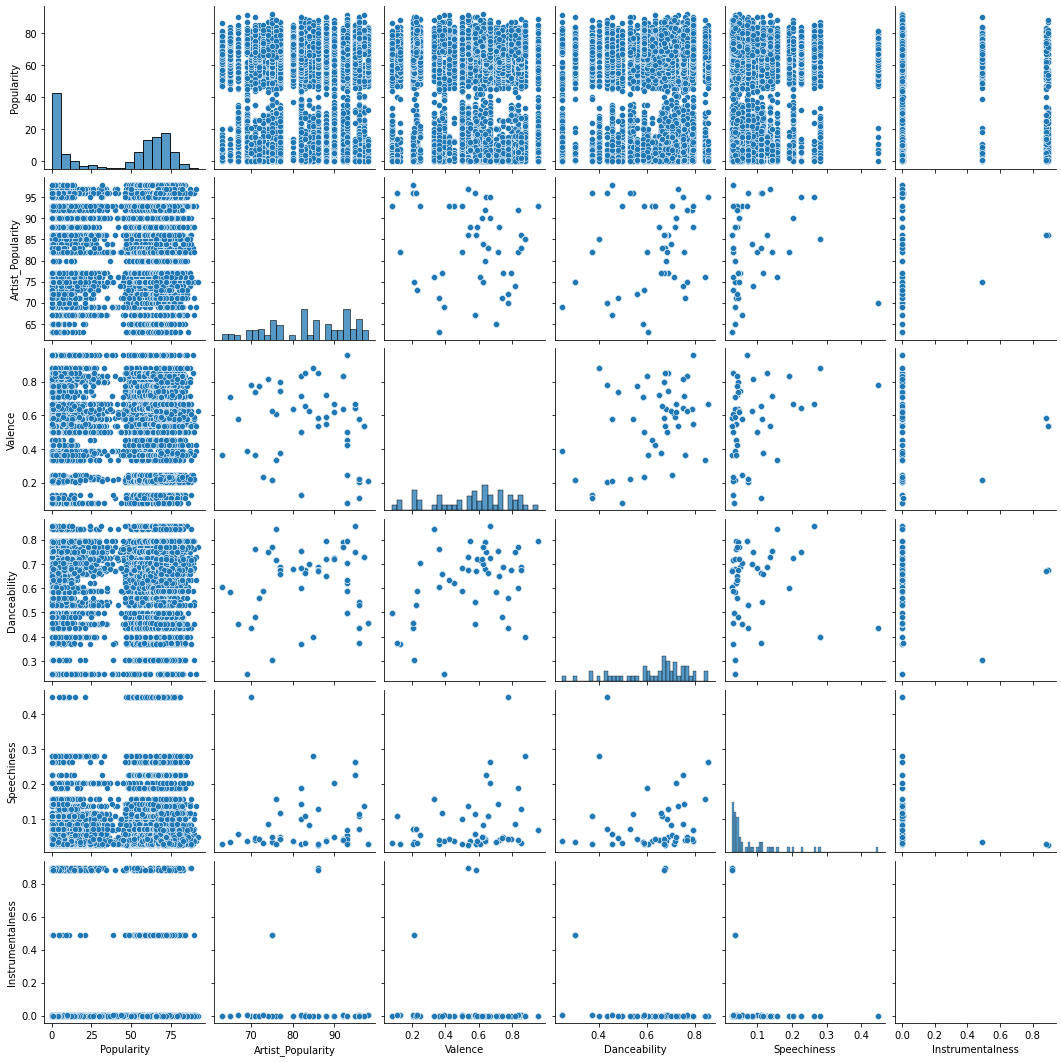

In [6]:
# pairplot refresher with selected columns
sns.pairplot(df[columns])

<AxesSubplot:>

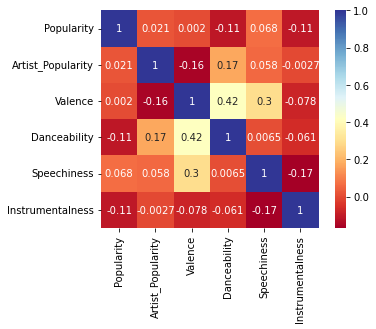

In [7]:
df_corr = df[columns]
corrmat = df_corr.corr()

#heatmap refresher with selected columns
sns.heatmap(corrmat, square=True, annot=True, cmap='RdYlBu')

<div style='background-color: lightgreen;' >

### Correlation Results
None of these individual numerical components have a strong correlation with popularity. Let's look at some categorical variables and combinations of variables.

album          8019
compilation    2014
single         1452
Name: Album_Type, dtype: int64

<AxesSubplot:xlabel='Album_Type', ylabel='Popularity'>

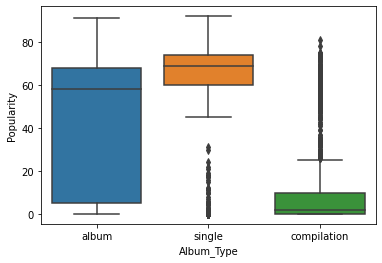

In [12]:
df['Album_Type'].value_counts()
sns.boxplot(x=df['Album_Type'], y=df['Popularity'])

<div style='background-color: lightgreen;' >

### Boxplot Results
It appears that singles tend to have a higher popularity ranking than albums or compilations. While there appear to be outliers in single and compilation, the data has been pulled from a reputible source and evaluated as correct. 

## Ranking and Categorization

In [49]:
from pandas import Categorical
speech_high = .66 #songs with speechiness higher than this are likely spoken word tracks
speech_low = .33 #songs with speechiness lower than this are likely instrumental tracks
instrum_mid = .5 #songs with instrumentalness higher than this are likely instrumental tracks

df['Track_Type'] = Categorical(np.where(df['Speechiness'] > speech_high,'spoken','track'))
df['Track_Type'] = Categorical(np.where((df['Speechiness'] < speech_low) & (df['Instrumentalness'] > instrum_mid), \
                                        'instrumental', df['Track_Type']))

track           11029
instrumental      456
Name: Track_Type, dtype: int64

<AxesSubplot:xlabel='Track_Type', ylabel='Popularity'>

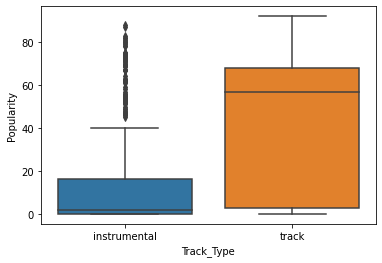

In [50]:
df['Track_Type'].value_counts()
sns.boxplot(x=df['Track_Type'], y=df['Popularity'])

<div style='background-color: wheat;' >

### Boxplot Results:
It appears that instrumental songs tend to have a lower popularity. There are no spoken word tracks in this dataset. 

In [51]:
df['Artist_Name'].nunique()

3526

In [52]:
df['Artist_Popularity'].describe()

count    11485.000000
mean        83.680627
std          9.623487
min         63.000000
25%         76.000000
50%         85.000000
75%         93.000000
max         98.000000
Name: Artist_Popularity, dtype: float64

In [53]:
cat_25 = df['Artist_Popularity'].describe()[4]
cat_50 = df['Artist_Popularity'].describe()[5]
cat_75 = df['Artist_Popularity'].describe()[6]

#categorize artists by percentile
df['Artist_Rank'] = Categorical(np.where(df['Artist_Popularity'] > cat_25,3,4))
df['Artist_Rank'] = Categorical(np.where(df['Artist_Popularity'] > cat_50,2,df['Artist_Rank']))
df['Artist_Rank'] = Categorical(np.where(df['Artist_Popularity'] > cat_75,1,df['Artist_Rank']))

In [54]:
df['Artist_Rank'].value_counts()

2    3664
4    3215
3    2756
1    1850
Name: Artist_Rank, dtype: int64

In [66]:
df.groupby('Artist_Rank').describe(include=np.number)

Popularity                                                    \
                 count       mean        std  min  25%   50%   75%   max   
Artist_Rank                                                                
1               1850.0  45.577297  30.020756  0.0  7.0  60.0  69.0  91.0   
2               3664.0  36.881004  31.661024  0.0  1.0  51.0  67.0  91.0   
3               2756.0  43.699565  30.513222  0.0  5.0  59.0  69.0  90.0   
4               3215.0  36.273406  31.564794  0.0  1.0  49.0  67.0  92.0   

            Artist_Popularity             ... Valence        Release_Year  \
                        count       mean  ...     75%    max        count   
Artist_Rank                               ...                               
1                      1850.0  96.123243  ...   0.641  0.668       1850.0   
2                      3664.0  90.255186  ...   0.667  0.955       3664.0   
3                      2756.0  81.175617  ...   0.833  0.878       2756.0   
4                      3215.0  71.175428  ...   0.740  0.816       3215.0   

                                                                            
                    mean       std     min     25%     50%     75%     max  
Artist_Rank                                                                 
1            2014.929730  6.162873  1962.0  2013.0  2016.0  2019.0  2022.0  
2            2015.070415  6.087492  1962.0  2013.0  2016.0  2019.0  2022.0  
3            2015.050798  5.695571  1964.0  2013.0  2016.0  2019.0  2022.0  
4            2014.967341  6.548740  1962.0  2013.0  2016.0  2019.0  2022.0  

[4 rows x 128 columns]

<AxesSubplot:xlabel='Artist_Rank', ylabel='Popularity'>

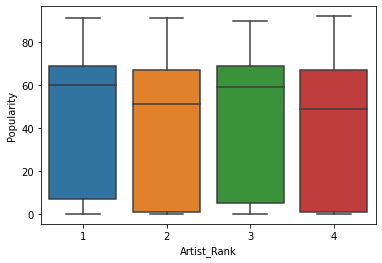

In [67]:
sns.boxplot(x=df['Artist_Rank'], y=df['Popularity'])

<div style='background-color: lightgreen;' >

### Boxplot Results:
It appears that artist popularity has no significant effect on track popularity. 

In [72]:
df['Valence'].describe()
val_25 = df['Valence'].describe()[4]
val_50 = df['Valence'].describe()[5]
val_75 = df['Valence'].describe()[6]

count    11485.000000
mean         0.552294
std          0.225774
min          0.078400
25%          0.377000
50%          0.591000
75%          0.720000
max          0.955000
Name: Valence, dtype: float64

In [73]:
#categorize valence by percentile
df['Val_Rank'] = Categorical(np.where(df['Valence'] > val_25,3,4))
df['Val_Rank'] = Categorical(np.where(df['Valence'] > val_50,2,df['Val_Rank']))
df['Val_Rank'] = Categorical(np.where(df['Valence'] > val_75,1,df['Val_Rank']))

In [74]:
df['Val_Rank'].value_counts()

4    3005
2    2982
1    2752
3    2746
Name: Val_Rank, dtype: int64

<AxesSubplot:xlabel='Val_Rank', ylabel='Popularity'>

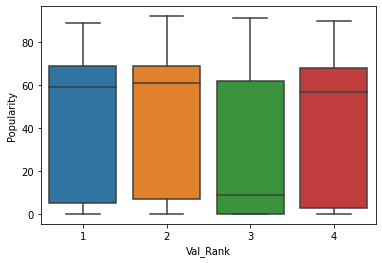

In [75]:
sns.boxplot(x=df['Val_Rank'], y=df['Popularity'])

In [76]:
df['Danceability'].describe()
dan_25 = df['Danceability'].describe()[4]
dan_50 = df['Danceability'].describe()[5]
dan_75 = df['Danceability'].describe()[6]

count    11485.000000
mean         0.626414
std          0.141320
min          0.247000
25%          0.542000
50%          0.671000
75%          0.723000
max          0.855000
Name: Danceability, dtype: float64

In [77]:
#categorize danceability by percentile
df['Dance_Rank'] = Categorical(np.where(df['Danceability'] > dan_25,3,4))
df['Dance_Rank'] = Categorical(np.where(df['Danceability'] > dan_50,2,df['Dance_Rank']))
df['Dance_Rank'] = Categorical(np.where(df['Danceability'] > dan_75,1,df['Dance_Rank']))

In [78]:
df['Dance_Rank'].value_counts()

4    3003
2    2955
3    2780
1    2747
Name: Dance_Rank, dtype: int64

<AxesSubplot:xlabel='Dance_Rank', ylabel='Popularity'>

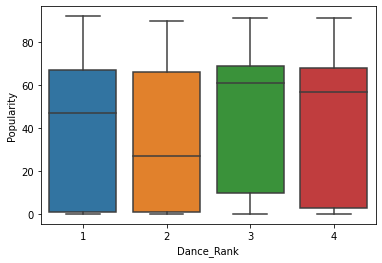

In [79]:
sns.boxplot(x=df['Dance_Rank'], y=df['Popularity'])

<div style='background-color: lightgreen;' >

### Boxplot Results:
It appears that neither Valence nor Danceability have a significant effect on track popularity. This could suggest that traditional radio listening does not affect overall Spotify streams. 